# Learning to use the common ML libraries

## Working with the Titanic data set

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display

# Using Pandas library to import a .csv data file and display part of the data
data = pd.read_csv("titanic_data.csv")

display(data.head())
# display(data[["PassengerId", "Survived", "Name"]].head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
# cleaning up the data to remove missing(NaN) data

print(data.describe())
print(data.isnull().sum())

#final cleaned dataset
cleanedData = data.dropna(inplace=False, subset=["Age"])
print(cleanedData.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex  

In [21]:
# Converting the imported data into NumPy arrays

# X = np.array(data[["PassengerId", "Name"]])
X = np.array(cleanedData[["Age", "Fare"]])
y = np.array(cleanedData["Survived"])

print(X[:5]);print(y[:5])

[[22.      7.25  ]
 [38.     71.2833]
 [26.      7.925 ]
 [35.     53.1   ]
 [35.      8.05  ]]
[0 1 1 1 0]


## Using sklearn

The following sections will contain me using the various inbuilt classifiers in the sklearn library, namely<br>
<b>-></b> Linear Regression<br>
<b>-></b> Decision Trees<br>
<b>-></b> Support Vector Machines

<b> Before fitting though, have to split data into training and testing sets.</b>

In [22]:
# Splitting data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

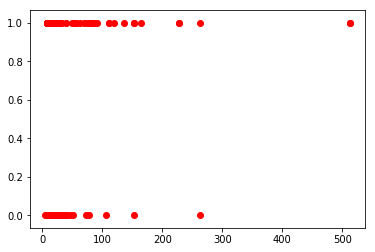

In [26]:
# Linear regression

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

prediction = classifier.predict(X_test)
plt.scatter(X_test[:,0], y_test, color='red')
# plt.plot(X_train, classifier.predict(X_train), color='blue')
plt.show()

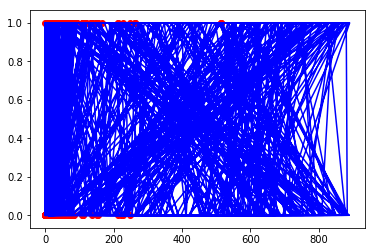

In [8]:
# Decision trees

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)
predictionDT = classifier.predict(X_train)

prediction = classifier.predict(X_test)
plt.scatter(X_train[:,2], y_train, color='red')
plt.plot(X_train, predictionDT, color='blue')
plt.show()

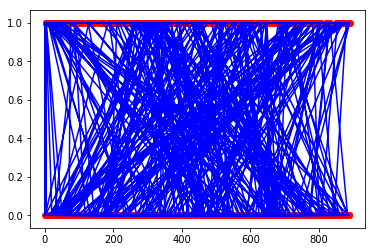

In [11]:
# Support Vector Machines

from sklearn.svm import SVC
classifier = SVC()

classifier.fit(X_train, y_train)

prediction = classifier.predict(X_test)
plt.scatter(X_train[:,0], y_train, color='red')
plt.plot(X_train, classifier.predict(X_train), color='blue')
plt.show()